#### LOADING IN PACKAGES

In [2]:
import s3fs; import xarray as xr; import numpy as np
import pandas as pd; 
import dask.array as da
import ocetrac

import matplotlib.pyplot as plt; import cartopy.crs as ccrs

import warnings; import expectexception
warnings.filterwarnings('ignore')

import netCDF4 as nc; import datetime as dt
import scipy

import intake; import pprint
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Enable more explicit control of DataFrame display (e.g., to omit annoying line numbers)
# from IPython.display import HTML

#### Dask (Use when really necessary)

In [2]:
# import dask

In [3]:
# # ONLY RUN THIS CELL ONCE
# # NOTE: you may need to change the project number
# from dask_jobqueue import PBSCluster
# from dask.distributed import Client
# proj = 'UWIS0040'

# # Setup your PBSCluster
# cluster = PBSCluster(
#     cores=1, # The number of cores you want
#     memory='40GB', # Amount of memory
#     processes=1, # How many processes
#     queue='casper', # The type of queue to utilize (/glade/u/apps/dav/opt/usr/bin/execcasper)
#     local_directory='$TMPDIR', # Use your local directory
#     resource_spec='select=1:ncpus=1:mem=20GB', # Specify resources
#     project=proj, # Input your project ID here
#     walltime='02:00:00', # Amount of wall time
#     interface='ib0', # Interface to use
# )

# # Scale up
# #cluster.scale(18)
# cluster.adapt(minimum=1,maximum=2)

In [4]:
# # Change your url to the dask dashboard so you can see it
# dask.config.set({'distributed.dashboard.link':'https://jupyterhub.hpc.ucar.edu/stable/user/{USER}/proxy/{port}/status'})

# # Setup your client
# client = Client(cluster)

In [5]:
# client

In [6]:
# cluster.close()
# client.shutdown()

### Open original collection description file

In [7]:
cat_url_orig = '/glade/collections/cmip/catalog/intake-esm-datastore/catalogs/glade-cesm2-le.json'
coll_orig = intake.open_esm_datastore(cat_url_orig)

In [8]:
subset = coll_orig.search(component='atm',variable='SST',frequency='month_1',experiment='historical')
subset_as_df = subset.df
grouped_df_subset = subset_as_df.groupby('member_id')
print(len(grouped_df_subset))

100


#### Load ensemble mean file

In [9]:
ensemble_mean = xr.open_dataset('/glade/work/cassiacai/ensemble_mean.nc')
# ensemble_mean = xr.open_dataset('/glade/work/cassiacai/ensemble_mean.nc', chunks = {})
ensemble_mean

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288, time: 1980)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) object 1850-02-01 00:00:00 ... 2015-01-01 00:00:00
Data variables:
    SST      (time, lat, lon) float32 ...

#### Make new netCDF files for SST and SSTA 

In [10]:
# SST_full = []; SSTA_full = []

# i = 1
# for l, ent in grouped_df_subset:
#     if i < 11:
#         print(i, l)
#         subset = coll_orig.search(component='atm',variable='SST',frequency='month_1',experiment='historical',member_id=l)
#     #     subset.df
#         dsets = subset.to_dataset_dict(zarr_kwargs={"consolidated": True}, storage_options={"anon": True})
#         key = list(dsets.keys())[0]
#         ds = dsets[str(key)]
#         SSTA_now = ds.SST.isel(member_id=0) - ensemble_mean; SSTA_full.append(SSTA_now.load())
#         SST_now = ds.SST.isel(member_id=0); SST_full.append(SSTA_now.load())
#         i+= 1

In [11]:
# %%time
# ensemble_mean = sum(SST_full)/100
# ensemble_mean

# ensemble_mean.to_netcdf('ensemble_mean.nc')
# ensemble_mean.close()

In [12]:
# %%time
# newfile = xr.concat([SST_full[0], SST_full[17], SST_full[34], SST_full[51],
#                     SST_full[1], SST_full[18], SST_full[35], SST_full[52],
#                     SST_full[2], SST_full[19], SST_full[36], SST_full[53],
#                     SST_full[3], SST_full[20], SST_full[37], SST_full[54], 
#                     SST_full[4], SST_full[21], SST_full[38], SST_full[55],
#                     SST_full[5], SST_full[22], SST_full[39], SST_full[56], 
#                     SST_full[6], SST_full[23], SST_full[40], SST_full[57], 
#                     SST_full[7], SST_full[24], SST_full[41], SST_full[58],
#                     SST_full[8], SST_full[25], SST_full[42], SST_full[59],
#                     SST_full[9], SST_full[26], SST_full[43], SST_full[60],
#                     SST_full[10], SST_full[27], SST_full[44], SST_full[61],
#                     SST_full[11], SST_full[28], SST_full[45], SST_full[62],
#                     SST_full[12], SST_full[29], SST_full[46], SST_full[63], 
#                     SST_full[13], SST_full[30], SST_full[47], SST_full[64],
#                     SST_full[14], SST_full[31], SST_full[48], SST_full[65],
#                     SST_full[15], SST_full[32], SST_full[49], SST_full[66], 
#                     SST_full[16], SST_full[33], SST_full[50], SST_full[67],
#                     SST_full[68], SST_full[69], SST_full[70], SST_full[71],
#                     SST_full[72], SST_full[73], SST_full[74], SST_full[75],
#                     SST_full[76], SST_full[77], SST_full[78], SST_full[79],
#                     SST_full[80], SST_full[81], SST_full[82], SST_full[83],
#                     SST_full[84], SST_full[85], SST_full[86], SST_full[87],
#                     SST_full[88], SST_full[89], SST_full[90], SST_full[91],
#                     SST_full[92], SST_full[93], SST_full[94], SST_full[95],
#                     SST_full[96], SST_full[97], SST_full[98], SST_full[99],
#                     ],dim='member_id')
# print(newfile)

In [13]:
# newfile = xr.concat([SST_full[0], SST_full[1], SST_full[2], SST_full[3],
#                     SST_full[4], SST_full[5], SST_full[6], SST_full[7],
#                     SST_full[8], SST_full[9]],dim='member_id')

In [14]:
# newfile.to_netcdf('SST_first10.nc')

In [15]:
# newfile.to_netcdf('SSTA_full.nc')
# newfile.to_netcdf('SST_full.nc')
# newfile.close()
# print ('finished saving')

# newfile.to_netcdf('SSTA_full.nc', encoding={'dis': {'zlib': True}})

#### Load SST and SSTA files

In [16]:
# M = np.array(1,101,1,dtype='int')
# M = xr.DataArray(M, dims=['M'], coords={'M':M})
# ds_mf = xr.open_mfdataset('/glade/work/cassiacai/SSTA_full.nc', concat_dim = M, combine='nested')

In [3]:
# SST_full = xr.open_dataset('/glade/work/cassiacai/SST_full.nc')
# print(SST_full)
SST_full = xr.open_dataset('SST_first10.nc')
SSTA_full = xr.open_dataset('/glade/work/cassiacai/SSTA_full.nc')

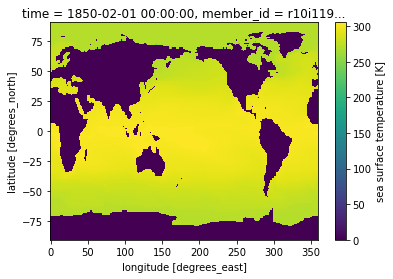

In [10]:
SST_full.SST[1,0,:,:].plot()
plt.show()

#### Decompose SST

In [25]:
sst = SST_full.SST
sst.load()

### Decompose SST maps into mean, trend, annual, and semi-annual harmonics
## Use least-squares regression and solve for model coefficients
dyr = sst.time.dt.year + (sst.time.dt.month-0.5)/12

# Our 6 coefficient model is composed of the mean, trend, annual sine and cosine harmonics, & semi-annual sine and cosine harmonics
model = np.array([np.ones(len(dyr))] + [dyr-np.mean(dyr)] + [np.sin(2*np.pi*dyr)] + [np.cos(2*np.pi*dyr)] + [np.sin(4*np.pi*dyr)] + [np.cos(4*np.pi*dyr)])

# Take the pseudo-inverse of model to 'solve' least-squares problem
pmodel = np.linalg.pinv(model)

# Convert model and pmodel to xaray DataArray
model_da = xr.DataArray(model.T, dims=['time','coeff'], coords={'time':sst.time.values, 'coeff':np.arange(1,7,1)}) 
pmodel_da = xr.DataArray(pmodel.T, dims=['coeff','time'], coords={'coeff':np.arange(1,7,1), 'time':sst.time.values})

<xarray.DataArray 'SST' (member_id: 10, time: 1980, lat: 192, lon: 288)>
array([[[[  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
            0.     ],
         [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
            0.     ],
         [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
            0.     ],
         ...,
         [271.34473, 271.34473, 271.34476, ..., 271.3447 , 271.3447 ,
          271.34473],
         [271.34967, 271.34967, 271.3497 , ..., 271.3496 , 271.3496 ,
          271.34964],
         [271.35263, 271.35263, 271.35263, ..., 271.35263, 271.35263,
          271.35263]],

        [[  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
            0.     ],
         [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
            0.     ],
         [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
            0.     ],
...
         [271.40964, 271.40967, 271.4097 , ..., 271.40952, 271.40955,
          271.4096 ],
         [271.41492, 271.41495, 271.41498, ..., 271.41483, 271.41486,
          271.4149 ],
         [271.41818, 271.41818, 271.41818, ..., 271.41818, 271.41818,
          271.41818]],

        [[  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
            0.     ],
         [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
            0.     ],
         [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
            0.     ],
         ...,
         [271.39856, 271.3986 , 271.39862, ..., 271.39847, 271.3985 ,
          271.39856],
         [271.4036 , 271.40363, 271.40366, ..., 271.4035 , 271.40353,
          271.40356],
         [271.40616, 271.40616, 271.40616, ..., 271.40616, 271.40616,
          271.40616]]]], dtype=float32)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time       (time) object 1850-02-01 00:00:00 ... 2015-01-01 00:00:00
  * member_id  (member_id) object 'r10i1181p1f1' ... 'r11i1301p1f2'
Attributes:
    units:         K
    long_name:     sea surface temperature
    cell_methods:  time: mean

In [26]:
# resulting coefficients of the model
sst_mod = xr.DataArray(pmodel_da.dot(sst), dims=['coeff','member_id','lat', 'lon'], coords={'coeff':np.arange(1,7,1), 'member_id':np.arange(0,10,1),'lat':sst.lat.values, 'lon':sst.lon.values})

In [59]:
transposed = model_da.dot(sst_mod).transpose("member_id", "time", "lat","lon")
print(transposed.shape)

(10, 1980, 192, 288)


In [60]:
print(sst.shape)

(10, 1980, 192, 288)


In [61]:
ssta_notrend = sst[0,:,:,:]-transposed[0,:,:,:] #this is anomalies
# ssta_notrend = sst-transposed #this is anomalies

In [62]:
ssta_notrend.shape

(1980, 192, 288)

In [63]:
detrended = ssta_notrend

In [89]:
ssta_notrend.to_netcdf("ssta_notrend_re_itself_ens0.nc")

#### Using ensemble mean

In [70]:
first_10_members = SSTA_full.isel(member_id = [0,1,2,3,4,5,6,7,8,9])

(10, 1980, 192, 288)

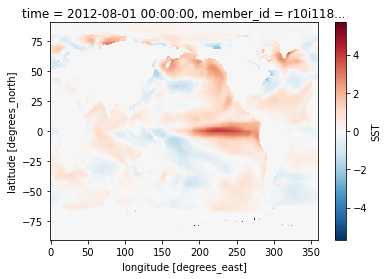

In [9]:
first_10_members.SST.shape
first_10_members.SST[0,1950,:,:].plot()

In [72]:
first_10_members_SST = SST_full.isel(member_id = [0,1,2,3,4,5,6,7,8,9])
first_10_members_SST

<xarray.Dataset>
Dimensions:    (lat: 192, lon: 288, time: 1980, member_id: 10)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time       (time) object 1850-02-01 00:00:00 ... 2015-01-01 00:00:00
  * member_id  (member_id) object 'r10i1181p1f1' ... 'r11i1301p1f2'
Data variables:
    SST        (member_id, time, lat, lon) float32 0.0 0.0 0.0 ... 271.4 271.4

(10, 1980, 192, 288)

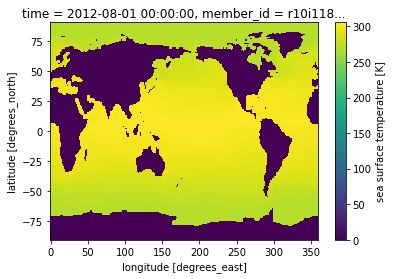

In [11]:
first_10_members_SST.SST.shape
first_10_members_SST.SST[0,1950,:,:].plot()

In [12]:
## Trying to crop (we can crop later)
# %%time
# SSTA_full_new = SSTA_full.where((SSTA_full.lat >= 39.109948) & (SSTA_full.lat <= 50.418848) 
#                         &(SSTA_full.lon >= 200.0) & (SSTA_full.lon <= 236.),drop=True)

# SST_full_new = SST_full.where((SST_full.lat >= 39.109948) & (SST_full.lat <= 50.418848) 
#                         &(SST_full.lon >= 200.0) & (SST_full.lon <= 236.),drop=True)

In [ ]:
detrended = first_10_members.SST

##### After choosing which way to detrend:

In [64]:
if detrended.chunks:
    detrended = detrended.chunk({'time': -1})

In [65]:
%%time
threshold = detrended.groupby('time.month').quantile(0.9,dim=('time')) 
features_ssta = detrended.where(detrended.groupby('time.month')>=threshold, other=np.nan)

CPU times: user 43.8 s, sys: 1.36 s, total: 45.1 s
Wall time: 47 s


In [66]:
%%time
features_ssta= features_ssta[:,:,:].load()

CPU times: user 931 µs, sys: 0 ns, total: 931 µs
Wall time: 940 µs


In [67]:
%%time
full_mask_land = features_ssta
full_masked = full_mask_land.where(full_mask_land != 0)
binary_out_afterlandmask=np.isfinite(full_masked)

CPU times: user 384 ms, sys: 399 ms, total: 783 ms
Wall time: 799 ms


In [68]:
%%time
full_mask_land = features_ssta
full_masked = full_mask_land.where(full_mask_land != 0)

CPU times: user 272 ms, sys: 427 ms, total: 699 ms
Wall time: 736 ms


In [81]:
%%time
# mask = np.isfinite(first_10_members_SST.SST) #with ensemble mean
mask = np.isfinite(first_10_members_SST.isel(member_id = 0).SST) 

CPU times: user 64.1 ms, sys: 39.9 ms, total: 104 ms
Wall time: 107 ms


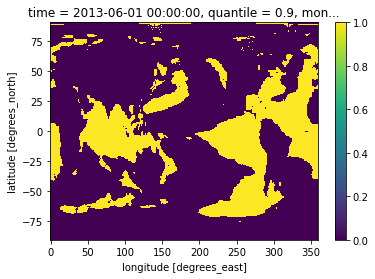

In [84]:
# binary_out_afterlandmask[6,1960,:,:].plot() #with ensemble mean
binary_out_afterlandmask[1960,:,:].plot()

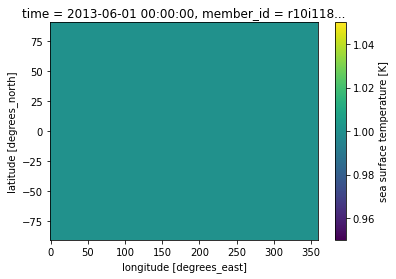

In [85]:
# mask[0,1960,:,:].plot()
mask[1960,:,:].plot()

(192, 288)
197.66042


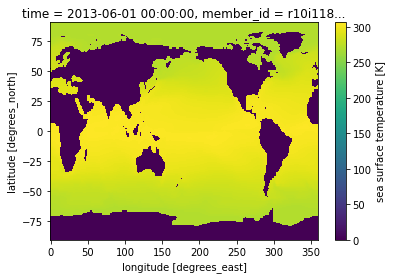

In [21]:
first_10_members_SST.SST[0,1960,:,:].plot()
print(first_10_members_SST.SST[0,1960,:,:].shape)
print(np.nanmean(first_10_members_SST.SST[0,1960,:,:]))

In [43]:
%%time
Tracker = ocetrac.Tracker(binary_out_afterlandmask[9,:,:,:], mask[9,:,:,:], radius=4, min_size_quartile=0., timedim = 'time', xdim = 'lon', ydim='lat', positive=True)
blobs = Tracker.track()

minimum area: 40.0
inital objects identified 	 17762
final objects tracked 	 4443
CPU times: user 4min 34s, sys: 2min 54s, total: 7min 29s
Wall time: 7min 39s


In [86]:
%%time
Tracker = ocetrac.Tracker(binary_out_afterlandmask[:,:,:], mask[:,:,:], radius=4, min_size_quartile=0., timedim = 'time', xdim = 'lon', ydim='lat', positive=True)
blobs = Tracker.track()

minimum area: 40.0
inital objects identified 	 7401
final objects tracked 	 1574
CPU times: user 2min 45s, sys: 1min 40s, total: 4min 25s
Wall time: 4min 34s


In [87]:
blobs.attrs

{'inital objects identified': 7401,
 'final objects tracked': 1574,
 'radius': 4,
 'size quantile threshold': 0.0,
 'min area': 40.0,
 'percent area reject': 4.986747717939576e-05,
 'percent area accept': 0.9999501325228206}

In [88]:
blobs.to_netcdf("blobs_ens_0_rad4_relitself.nc")

<Figure size 1152x216 with 0 Axes>

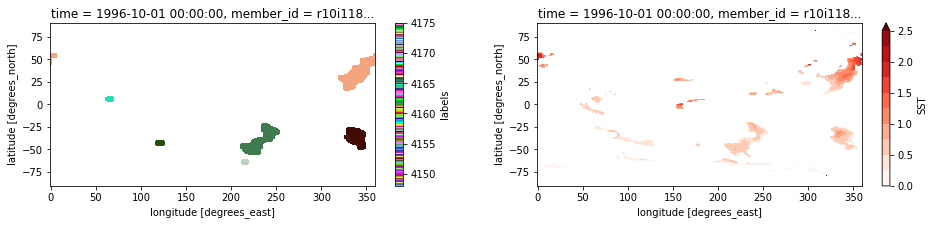

In [55]:
from matplotlib.colors import ListedColormap
maxl = int(np.nanmax(blobs.values))
cm = ListedColormap(np.random.random(size=(maxl, 3)).tolist())

timed = 1760
plt.figure(figsize=(16,3))
ax1 = plt.subplot(121)
blobs.isel(time=timed).plot(cmap= cm)
# features_ssta.isel(time=timed).where(features_ssta.isel(time=timed)==0.0).plot.contourf(colors='k', add_colorbar=False)

ax2 = plt.subplot(122); 
full_masked[0,timed,:,:].plot(levels=[0.0,0.25,0.50,0.75,1.0,1.25,1.50,1.75,2.0,2.25,2.5],cmap='Reds')
# features_ssta.isel(time=timed).where(features_ssta.isel(time=timed)==0.0).plot.contourf(colors='k', add_colorbar=False)
plt.show()

## Code from before 

In [35]:
detrended = SSTA_full.SST.isel(member_id=0)

In [36]:
if detrended.chunks:
    detrended = detrended.chunk({'time': -1})

In [37]:
threshold = detrended.groupby('time.month').quantile(0.9,dim=('time')) 
features_ssta = detrended.where(detrended.groupby('time.month')>=threshold, other=np.nan)

In [ ]:
%%time
features_ssta= features_ssta[:,:,:].load()

In [ ]:
timed = 300
full_mask_land = features_ssta
full_masked = full_mask_land.where(full_mask_land != 0)
binary_out_afterlandmask=np.isfinite(full_masked)

binary_out_afterlandmask[timed,:,:].plot()

In [ ]:
full_mask_land = features_ssta
full_masked = full_mask_land.where(full_mask_land != 0)

In [ ]:
full_masked[300,:,:].plot()

In [ ]:
SST_full.SST.isel(time=0, member_id=0)

In [ ]:
mask = np.isfinite(SST_full.SST.isel(time=0, member_id=0)) 
mask.plot()

In [ ]:
mask

In [ ]:
newmask_1 = SST_full.SST.isel(member_id=0)
newmask = newmask_1.where(newmask_1 != 0)

In [ ]:
newmask[timed,:,:].plot()

In [ ]:
binary_out_afterlandmask.shape
mask.shape

In [ ]:
# %%time
Tracker = ocetrac.Tracker(binary_out_afterlandmask[:,:,:], mask, radius=6, min_size_quartile=0., timedim = 'time', xdim = 'lon', ydim='lat', positive=True)
blobs = Tracker.track()

In [ ]:
blobs.attrs